In [13]:
from sklearn import datasets 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import seaborn as sns 

In [14]:
df = pd.read_csv('advertising.csv')
df = df.drop(columns='Sales')
df.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

,0,1,2
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [16]:
#sns.heatmap(scaled_data.corr())

In [17]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,2.111124,0.545027
1,0.963044,-1.429895
2,1.975686,-1.969174
3,1.742935,-0.317004
4,0.386961,0.326528


In [18]:
#sns.heatmap(data_pca.corr())

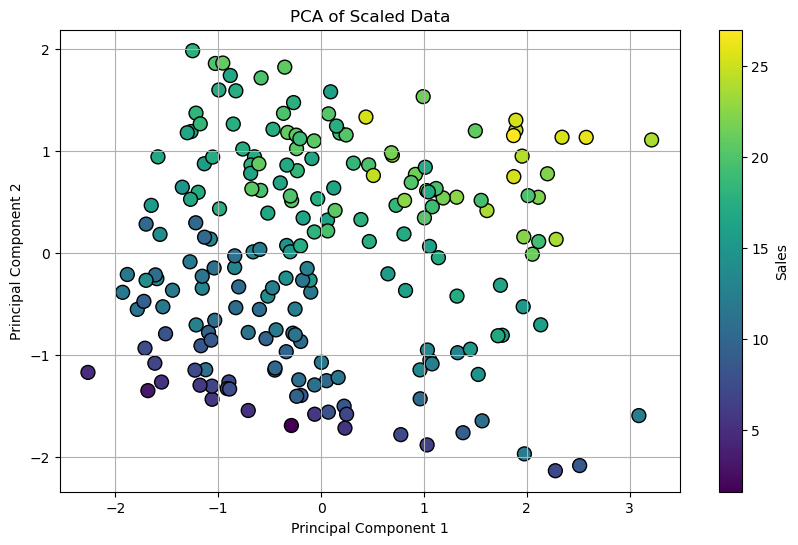

In [19]:
import matplotlib.pyplot as plt

df = pd.read_csv('advertising.csv')

labels = df['Sales']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_pca['PC1'], data_pca['PC2'], c=labels, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Sales')  # Color bar indicating numeric class labels
plt.grid()
plt.show()
